## Rahul Rajput 19BCE1084

## Garima Rout 19BCE1144

In [16]:
%config IPCompleter.greedy=True

In [17]:
import sys
print(sys.executable)

C:\Users\rahul\anaconda3\python.exe


In [18]:
# Libraries used
import pandas as pd
import numpy as np
import pandas_profiling as pp
from IPython.core.display import display, HTML
# from tqdm import tqdm_notebook.tqdm as tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,f1_score, recall_score,precision_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
%matplotlib inline
# tqdm().pandas()

In [19]:
src_file = "zomato.csv"
data = pd.read_csv(src_file)

In [20]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
display(HTML('<h1>Columns data type</h1>'))
data_columns = data.columns.tolist()
for i in data_columns:
    print(i," : ",  data[i].dtype)

url  :  object
address  :  object
name  :  object
online_order  :  object
book_table  :  object
rate  :  object
votes  :  int64
phone  :  object
location  :  object
rest_type  :  object
dish_liked  :  object
cuisines  :  object
approx_cost(for two people)  :  object
reviews_list  :  object
menu_item  :  object
listed_in(type)  :  object
listed_in(city)  :  object


In [22]:
# Renaming the column values
column_name = {'usl':'url', 
               'address':'address',
               'name':'name',  
               'online_order':'netorder',
               'book_table':'booktable', 
               'rate':'rating',
               'votes':'votes', 
               'phone':'phone', 
               'location':'location', 
               'rest_type':'resttype', 
               'dish_liked':'dishliked', 
               'cuisines':'cuisines', 
               'approx_cost(for two people)':'cost', 
               'reviews_list':'reviews', 
               'menu_item':'menuitems', 
               'listed_in(type)':'listedin', 
               'listed_in(city)':'city'}

In [23]:
data  = data.rename(columns= column_name)

In [24]:
data.isnull().sum()

url              0
address          0
name             0
netorder         0
booktable        0
rating        7775
votes            0
phone         1208
location        21
resttype       227
dishliked    28078
cuisines        45
cost           346
reviews          0
menuitems        0
listedin         0
city             0
dtype: int64

In [25]:
display(HTML('<h1>Percentage of Null Values</h1>'))
data.isnull().sum()*100/data.shape[0]

url           0.000000
address       0.000000
name          0.000000
netorder      0.000000
booktable     0.000000
rating       15.033741
votes         0.000000
phone         2.335789
location      0.040606
resttype      0.438927
dishliked    54.291626
cuisines      0.087012
cost          0.669026
reviews       0.000000
menuitems     0.000000
listedin      0.000000
city          0.000000
dtype: float64

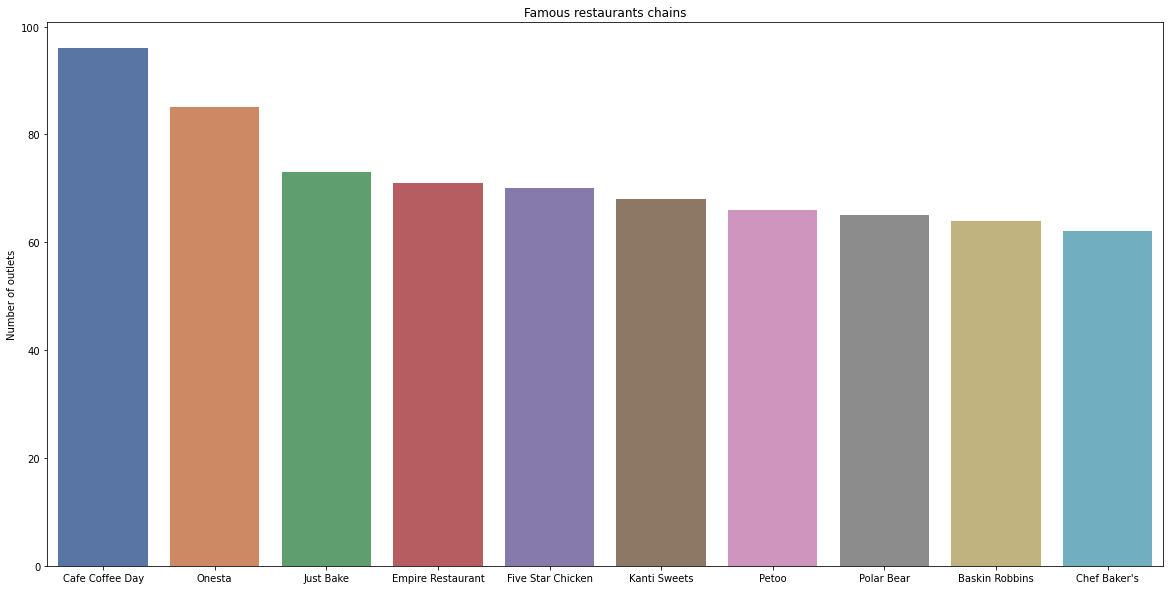

In [26]:
plt.figure(figsize=(20,10))
outlets = data['name'].value_counts()[:10]
sns.barplot(x = outlets.index, y = outlets, palette='deep')
plt.title("Famous restaurants chains")
plt.ylabel("Number of outlets")
plt.savefig("famous-restaurants-chains.png")
plt.show()


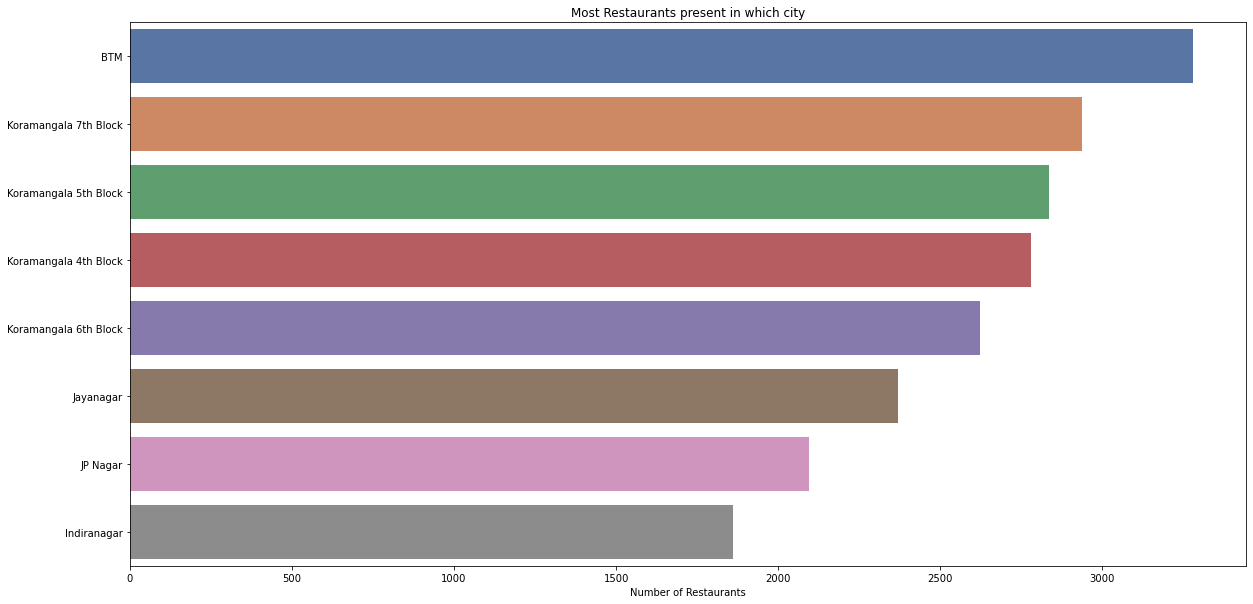

In [27]:
plt.figure(figsize=(20,10))
outlets = data['city'].value_counts()[:8]
sns.barplot(y = outlets.index, x = outlets, palette='deep')
plt.title("Most Restaurants present in which city")
plt.xlabel("Number of Restaurants")
plt.savefig("most-restaurants-city.png")
plt.show()

### Here Items are pruned on basis that usability and necessity to contribute in analysis

In [28]:
prune_items = ['url', 'address', 'name', 'phone', 'location',  'dishliked', 'menuitems']
data =  data.drop(prune_items, axis=1)

In [29]:
# Removing the rating
data.rating = data.rating.str[:3]

In [30]:
# Storing the data temporary
df = data[:]

### Function to fill empty rating values from the reviews by rating

In [31]:
def rating_is_null():
    reviews= {}
    null_brackets = []
    rating_null_index = df[df['rating'].isnull()].index.tolist()
    #print('null index: ', rating_null_index)
    for null_indexes in rating_null_index:
        temp_rev = df['reviews'][null_indexes]
        if temp_rev == '[]':
            null_brackets.append(null_indexes)
        elif type(temp_rev) == str:
            review_index = [i for i in range(len(temp_rev)) if temp_rev.startswith('(\'Rated ', i)]
            scores = [float(temp_rev[i+7:i+10]) for i in review_index]
            #print(np.mean(scores))
            df.loc[null_indexes, 'rating'] = round(np.mean(scores), 2)
    return null_brackets
    
    

In [32]:
rating_still_null = rating_is_null()

In [33]:
df['rating'] =  df['rating'].replace( to_replace =['NEW', '-'], value =np.nan)
df['rating'] =  df['rating'].fillna(df['rating'].mode()[0])
df['rating'] =  df['rating'].astype(float)
df['rating'] =  pd.cut(df['rating'], 4, labels=[1,2,3,4])
df['rating'].unique()

[4, 3, 2, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

In [34]:
df = df.dropna()
df = df.drop('reviews', axis=1)
df = df.reset_index()

In [35]:
df.isnull().sum()

index        0
netorder     0
booktable    0
rating       0
votes        0
resttype     0
cuisines     0
cost         0
listedin     0
city         0
dtype: int64

### Creating asymmetric data of compound columns

In [36]:
def createSimpleColumns(c_name):
    restype_unique = df[c_name].unique().tolist()
    final_resttype = []
    for i in restype_unique:
        if(i.find(',') != -1):
            temp = i.split(',')
            for j in temp:
                final_resttype.append(j.strip().replace(" ", "_"))
        else:
            final_resttype.append(i.strip().replace(" ", "_"))
            
    final_resttype = list(frozenset(final_resttype))
    restype_datalist = df[c_name].tolist()
    df_resttype = pd.DataFrame(0, index=np.arange(len(restype_datalist)),columns=final_resttype)
    c = 0

    for i in tqdm(restype_datalist):
        k = []
        if (i.find(',') != -1):
            temp = i.split(',')
            for j in temp:
                j = j.strip()
                k.append(j)
        else:
            k.append(i.strip())
        df_resttype.loc[c] = np.isin(final_resttype, k).astype(int)
        c+=1
    return df_resttype, final_resttype

In [37]:
df_resttype,list_resttype = createSimpleColumns('resttype')
df_cuisines, list_cuisines = createSimpleColumns('cuisines')
df_resttype.rename(columns={'Cafe':'Rest_Cafe', 'Bakery':'Rest_Bakery'}, inplace=True)
d_res_cus = pd.merge(df_resttype, df_cuisines, left_index=True, right_index=True)
df = pd.merge(df, d_res_cus, left_index=True, right_index=True)

<ipython-input-36-4e77a68b6dbf>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(restype_datalist):


  0%|          | 0/51148 [00:00<?, ?it/s]

  0%|          | 0/51148 [00:00<?, ?it/s]

In [38]:
df  = df.drop('resttype', axis = 1)
df  = df.drop('cuisines', axis = 1)
# df  = df.drop(['level_0','index'], axis = 1)
df = df.drop('index', axis=1)

In [39]:
df['netorder']  = df['netorder'].replace(to_replace=['No', 'Yes'], value=[0, 1])
df['booktable'] = df['booktable'].replace(to_replace=['No', 'Yes'], value=[0, 1])

In [40]:
df.head()

,netorder,booktable,rating,votes,cost,listedin,city,Sweet_Shop,Lounge,Mess,...,South_American,Street_Food,Grill,Coffee,Steak,Hot_dogs,British,Raw_Meats,Iranian,Vietnamese
0,1,1,4,775,800,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4,787,800,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3,918,800,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3,88,300,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,166,600,Buffet,Banashankari,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
toonedata = df['listedin'].unique().tolist()

In [42]:
df_listedin, list_listedin = createSimpleColumns('listedin')
df_city, list_city     = createSimpleColumns('city')
df          = pd.merge(df, df_listedin, left_index=True, right_index=True)
df          = pd.merge(df, df_city    , left_index=True, right_index=True)
df          = df.drop('city', axis=1)
df          = df.drop('listedin', axis=1)

<ipython-input-36-4e77a68b6dbf>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(restype_datalist):


  0%|          | 0/51148 [00:00<?, ?it/s]

  0%|          | 0/51148 [00:00<?, ?it/s]

### Rearranging the columns

In [43]:
final_columns =  df.columns.tolist()[3:] +df.columns.tolist()[:3]
df = df[final_columns]

In [44]:
df.head()

,votes,cost,Sweet_Shop,Lounge,Mess,Dhaba,Quick_Bites,Meat_Shop,Confectionery,Delivery_x,...,Koramangala_6th_Block,New_BEL_Road,Kammanahalli,Banashankari,Whitefield,HSR,Church_Street,netorder,booktable,rating
0,775,800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,4
1,787,800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,4
2,918,800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3
3,88,300,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
4,166,600,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3


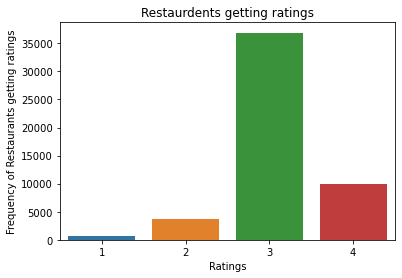

In [45]:
#plt.figure(figsize=(10,10))
outlets = df['rating'].value_counts()
sns.barplot(x = outlets.index, y = outlets)
plt.title("Restaurdents getting ratings")
plt.ylabel('Frequency of Restaurants getting ratings')
plt.xlabel('Ratings')
plt.savefig("rating-classes-frequency.png")
plt.show()

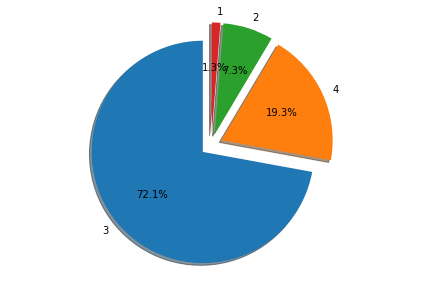

In [46]:

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.1, 0.1)
#add colors
fig1, ax1 = plt.subplots()
ax1.pie(outlets, explode=explode, labels=outlets.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.savefig("pie-rating-classes-percentage.png")
plt.show()

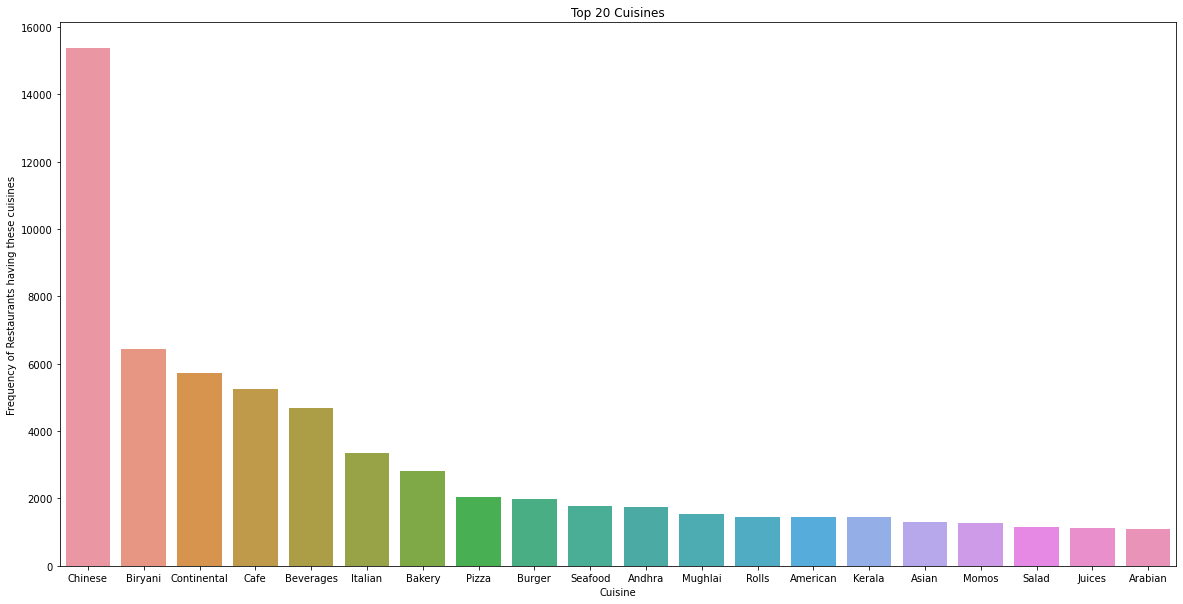

In [47]:
def topcuisine():
    k =[i for i in list_cuisines if i in df.columns]
    list_cuisines_top = {}
    for i in k:
        if df[i].value_counts()[0] != df.shape[0]:
            list_cuisines_top[i]=df[i].value_counts().tolist()[1]
    list_cuisines_top_sorted = sorted(list_cuisines_top.items(), key=lambda x:x[-1],reverse=True)
    plt.figure(figsize=(20,10))
    sns.barplot(x = [i[0] for i in list_cuisines_top_sorted[:20]], y = [i[1] for i in list_cuisines_top_sorted[:20]])
    plt.title("Top 20 Cuisines")
    plt.ylabel('Frequency of Restaurants having these cuisines')
    plt.xlabel('Cuisine')
    plt.savefig("top20-cuisines.png")
    

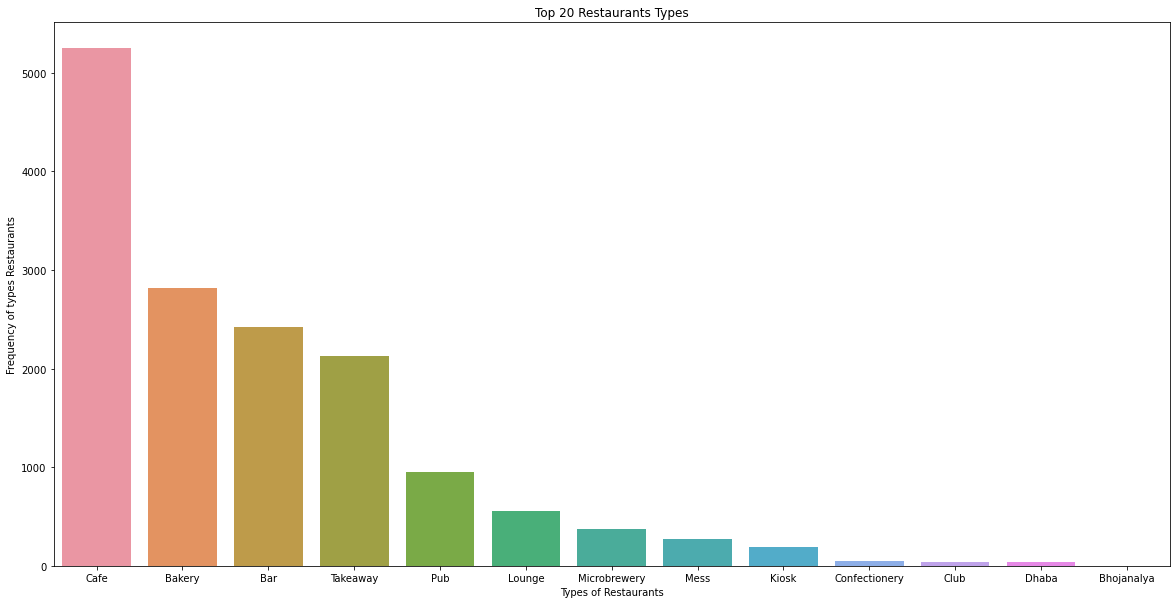

In [48]:
def topresttype():
    k =[i for i in list_resttype if i in df.columns]
    list_resttype_top = {}
    for i in k:
        if df[i].value_counts()[0] != df.shape[0]:
            list_resttype_top[i]=df[i].value_counts().tolist()[1]
    
    list_resttype_top_sorted = sorted(list_resttype_top.items(), key=lambda x:x[-1],reverse=True)
    list_top_rest = [i[0] for i in list_resttype_top_sorted[:20]]
    plt.figure(figsize=(20,10))
    sns.barplot(x = [i[0] for i in list_resttype_top_sorted[:20]], y = [i[1] for i in list_resttype_top_sorted[:20]])
    plt.title("Top 20 Restaurants Types")
    plt.ylabel('Frequency of types Restaurants')
    plt.xlabel('Types of Restaurants')
    plt.savefig("top20-restaurdants-type.png")
    plt.show()
    return list_top_rest

list_top_rest = topresttype() 

In [50]:
df['rating'].value_counts()

3    36887
4     9894
2     3727
1      640
Name: rating, dtype: int64

### Encoding the data

In [51]:
labelencoder   = LabelEncoder()

In [52]:
df = df.apply(labelencoder.fit_transform)

In [53]:
df2 = df[:]

In [54]:
#Using Pearson Correlation
corr = df.corr().abs()
corr

,votes,cost,Sweet_Shop,Lounge,Mess,Dhaba,Quick_Bites,Meat_Shop,Confectionery,Delivery_x,...,Koramangala_6th_Block,New_BEL_Road,Kammanahalli,Banashankari,Whitefield,HSR,Church_Street,netorder,booktable,rating
votes,1.000000,0.200787,NaN,0.131098,0.028649,0.013257,NaN,NaN,0.015445,0.113287,...,NaN,NaN,0.036480,0.018493,0.019717,0.016346,NaN,0.086313,0.526761,0.480929
cost,0.200787,1.000000,NaN,0.155928,0.019910,0.000080,NaN,NaN,0.027465,0.102884,...,NaN,NaN,0.027109,0.004612,0.009182,0.031457,NaN,0.178009,0.345047,0.158722
Sweet_Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lounge,0.131098,0.155928,NaN,1.000000,0.007644,0.002930,NaN,NaN,0.003176,0.032894,...,NaN,NaN,0.013381,0.010761,0.007309,0.004962,NaN,0.095981,0.142710,0.042549
Mess,0.028649,0.019910,NaN,0.007644,1.000000,0.002042,NaN,NaN,0.002213,0.022921,...,NaN,NaN,0.003531,0.001166,0.005529,0.003213,NaN,0.048561,0.027722,0.008798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HSR,0.016346,0.031457,NaN,0.004962,0.003213,0.001360,NaN,NaN,0.001472,0.038181,...,NaN,NaN,0.030293,0.024453,0.033515,1.000000,NaN,0.035009,0.012673,0.017396
Church_Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
netorder,0.086313,0.178009,NaN,0.095981,0.048561,0.014655,NaN,NaN,0.001507,0.043111,...,NaN,NaN,0.001043,0.010322,0.021411,0.035009,NaN,1.000000,0.002010,0.040553
booktable,0.526761,0.345047,NaN,0.142710,0.027722,0.010626,NaN,NaN,0.011519,0.118468,...,NaN,NaN,0.021237,0.029974,0.003638,0.012673,NaN,0.002010,1.000000,0.380078


In [55]:
to_drop = []
for col in df.columns:
    if np.isnan(corr[col].values).astype(int).sum() == df.shape[1] :
        to_drop.append(col)

In [56]:
df = df.drop(to_drop, axis=1)

In [57]:
def drawranking(r, n, order=1):
    return dict(zip(n, map(lambda x: round(x,2),  MinMaxScaler().fit_transform(order*np.array([r]).T).T[0])))

In [58]:
b_df = df[:]
cols = list(df)
feature_cols = cols[:len(cols)-1]
X = df[feature_cols] # Features
y = df.rating # Target variable

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
def getModels(X,y):
    colnames = feature_cols
    print(len(colnames))
    model = [0,0,0,0,0]
    name  = ['LinearRegression', 'RFE', 'Ridge', 'Lasso', 'RandomForestRegressor']
    model[0]  = LinearRegression(normalize=True).fit(X, y)
    model[1]  = RFE(model[0], verbose =3).fit(X, y)
    model[2]  = Ridge(alpha = 7).fit(X, y)
    model[3]  = Lasso(alpha=0.05).fit(X, y)
    model[4]  = RandomForestRegressor(n_jobs=-1, n_estimators=100, verbose=3).fit(X, y)
    return model
model = getModels(X,y)

123
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   48.5s


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


In [61]:
def drawgraph(data,gph_columns):
    sns.catplot(x=gph_columns[1], y=gph_columns[0], data = data[:20], kind="bar",height=10,  palette='coolwarm')
    plt.title("Top 20")
    plt.savefig("top20-features.png")
    sns.catplot(x=gph_columns[1], y=gph_columns[0], data = data[-20:], kind="bar",height=10,  palette='coolwarm')
    plt.title("Bottom 20")
    plt.savefig("bottom20-features.png")
    

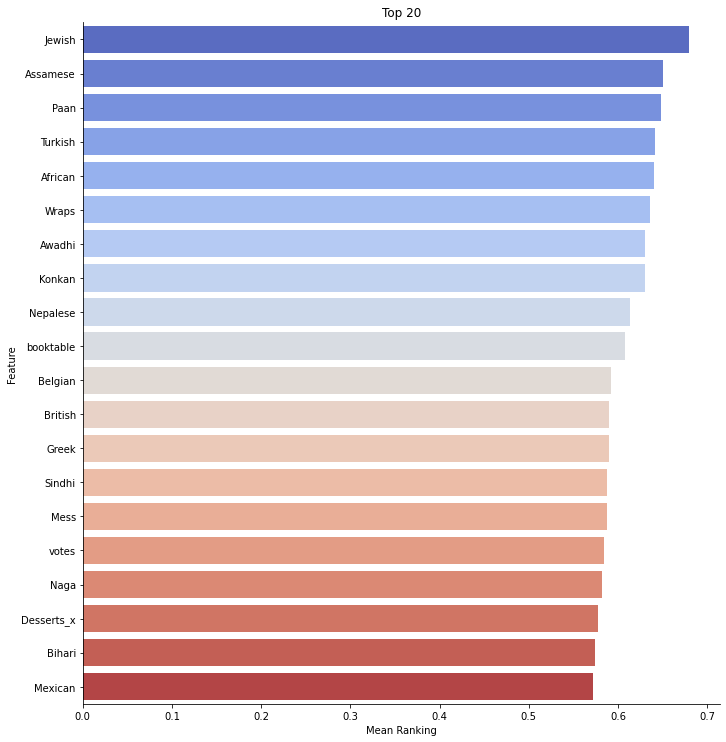

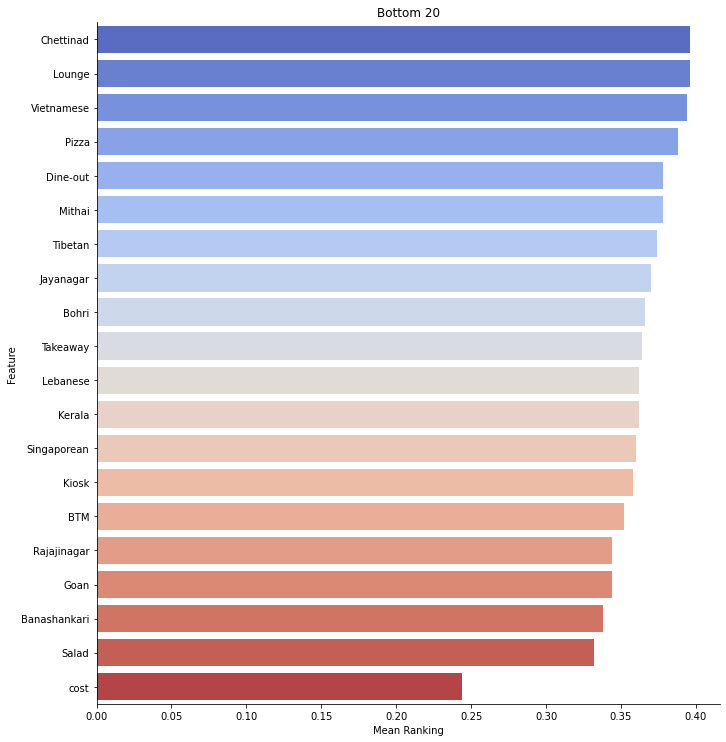

In [62]:
def testattributes(X,y):
    ranks = {}
    name  = ['LinearRegression', 'RFE', 'Ridge', 'Lasso', 'RandomForestRegressor']
    for i in range(len(model)):
        if name[i] == 'RFE':
            ranks[name[i]] =  drawranking(list(map(float, model[i].ranking_)), feature_cols, order=-1)
        elif name[i] == 'RandomForestRegressor':
            ranks[name[i]] =  drawranking(model[i].feature_importances_, feature_cols)
        else:
            ranks[name[i]] =  drawranking(list(map(float, model[i].coef_)), feature_cols)
   
    mean_scores = {}
    for i in feature_cols:
        mean_scores[i] = round(np.mean([ranks[method][i] for method in ranks.keys()]), 4)

    gph_columns = ['Feature','Mean Ranking']
    data = pd.DataFrame(list(mean_scores.items()), columns=gph_columns).sort_values(gph_columns[1], ascending=False)
    drawgraph(data,gph_columns)
    return data
meanplot = testattributes(X,y)

In [65]:
from xgboost import plot_importance

def xgaimportancefilter(X,y):
    model = XGBClassifier()
    model.fit(X, y)
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_importance(model, ax=ax)
    plt.savefig("feature-importance-with-feature-removing.png")
    plt.show()

In [64]:
pip install xgboost

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [67]:
modelNB = GaussianNB()
rfc = RandomForestClassifier(n_estimators=50)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
xgb = XGBClassifier()

models = [modelNB, rfc, mlp, xgb]
modelNames = ['GaussianNB','RandomForest', 'MLPC', 'XGBClassifier']

In [68]:
feature_are = ['Dropping Least Attribute', 'Original Attribute', 'Balanced Class']
modelWithDiff = [[],[],[]]
def getModelScores(type):
    l = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(modelNames[models.index(model)]," Accuracy:",accuracy_score(y_test, y_pred)) 
        l.append([type,modelNames[models.index(model)],accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')])
    return l

In [69]:
to_drop = meanplot[meanplot['Mean Ranking'] <= 0.35]['Feature'].tolist()
df2 = df[:]
df2 = df.drop(to_drop, axis=1)

In [70]:
cols = list(df2)
feature_cols = cols[:len(cols)-1]
X = df2[feature_cols] # Features
y = df2.rating # Target variable

In [71]:
modelWithDiff[0] = getModelScores(feature_are[0])

GaussianNB  Accuracy: 0.1742913000977517
RandomForest  Accuracy: 0.8759530791788857
MLPC  Accuracy: 0.8177908113391984


C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier  Accuracy: 0.8624633431085044


In [72]:
# xgaimportancefilter(X,y)

In [73]:
cols = list(df)
feature_cols = cols[:len(cols)-1]
X = df[feature_cols] # Features
y = df.rating # Target variable

In [74]:
modelWithDiff[1] = getModelScores(feature_are[1])

GaussianNB  Accuracy: 0.1638318670576735
RandomForest  Accuracy: 0.9090909090909091
MLPC  Accuracy: 0.8251221896383186


C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier  Accuracy: 0.8794721407624634


In [75]:
model = XGBClassifier()
model.fit(X, y)

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

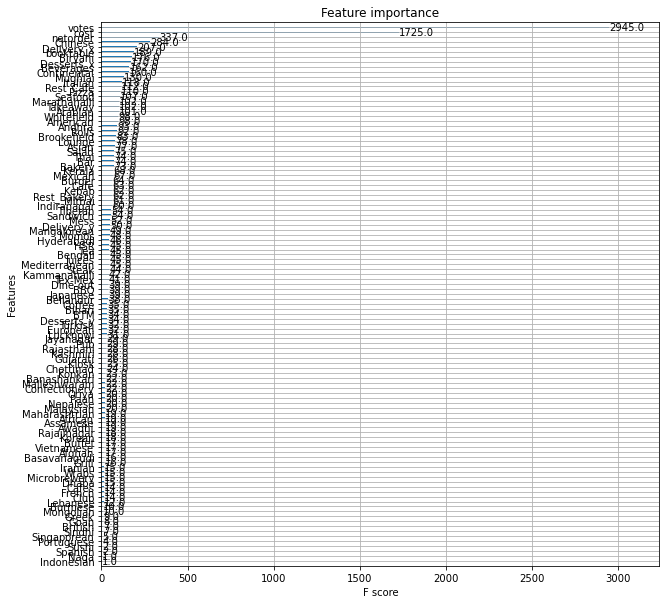

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(model, ax=ax)
plt.savefig("feature-importance.png")
plt.show()

In [77]:
df_temp = df[:]
d_rate2 = resample(df[df['rating'] == 2], replace=False, n_samples=1200, random_state=123)
d_rate3 = resample(df[df['rating'] == 3], replace=False, n_samples=1200, random_state=123)
d_rate1 = resample(df[df['rating'] == 1], replace=False, n_samples=1200, random_state=123)
d_rate0 = resample(df[df['rating'] == 0], replace=False, n_samples=640, random_state=123)
df_sampled = pd.concat([d_rate0,d_rate1,d_rate2,d_rate3])

In [78]:
cols = list(df_sampled)
feature_cols = cols[:len(cols)-1]
X = df_sampled[feature_cols] # Features
y = df_sampled.rating # Target variable

In [79]:
modelWithDiff[2] = getModelScores(feature_are[2])

GaussianNB  Accuracy: 0.3632075471698113
RandomForest  Accuracy: 0.6875
MLPC  Accuracy: 0.6379716981132075


C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier  Accuracy: 0.6816037735849056


C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


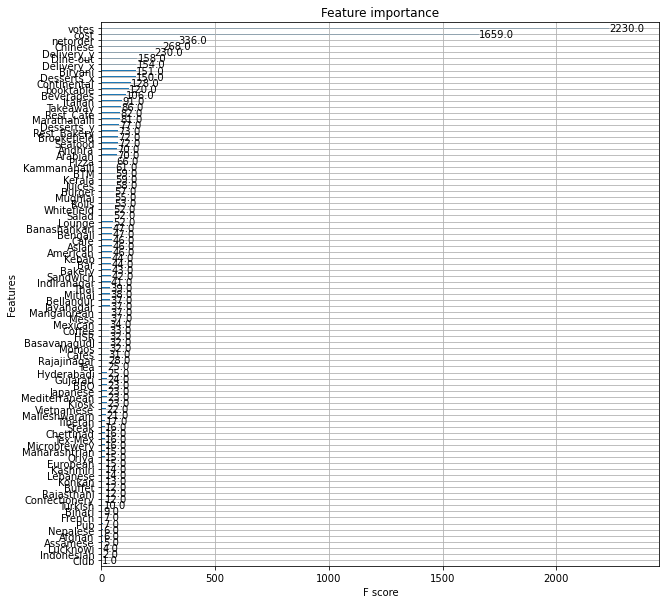

In [80]:
xgaimportancefilter(X,y)

In [81]:
data_m_plot = []
for i in modelWithDiff:
    for j in i:
        data_m_plot.append(j)

In [82]:
dfmodelcomp = pd.DataFrame(data = data_m_plot, columns=['Attribute_Used', 'Models', 'Accuracy', 'Precision Score','F1-Score'])
dfmodelcomp

,Attribute_Used,Models,Accuracy,Precision Score,F1-Score
0,Dropping Least Attribute,GaussianNB,0.174291,0.566981,0.210901
1,Dropping Least Attribute,RandomForest,0.875953,0.865629,0.867626
2,Dropping Least Attribute,MLPC,0.817791,0.802187,0.786938
3,Dropping Least Attribute,XGBClassifier,0.862463,0.866784,0.835551
4,Original Attribute,GaussianNB,0.163832,0.575003,0.200069
5,Original Attribute,RandomForest,0.909091,0.903335,0.902442
6,Original Attribute,MLPC,0.825122,0.798522,0.793935
7,Original Attribute,XGBClassifier,0.879472,0.882318,0.856659
8,Balanced Class,GaussianNB,0.363208,0.464272,0.349274
9,Balanced Class,RandomForest,0.687500,0.687063,0.679059


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x576 with 0 Axes>

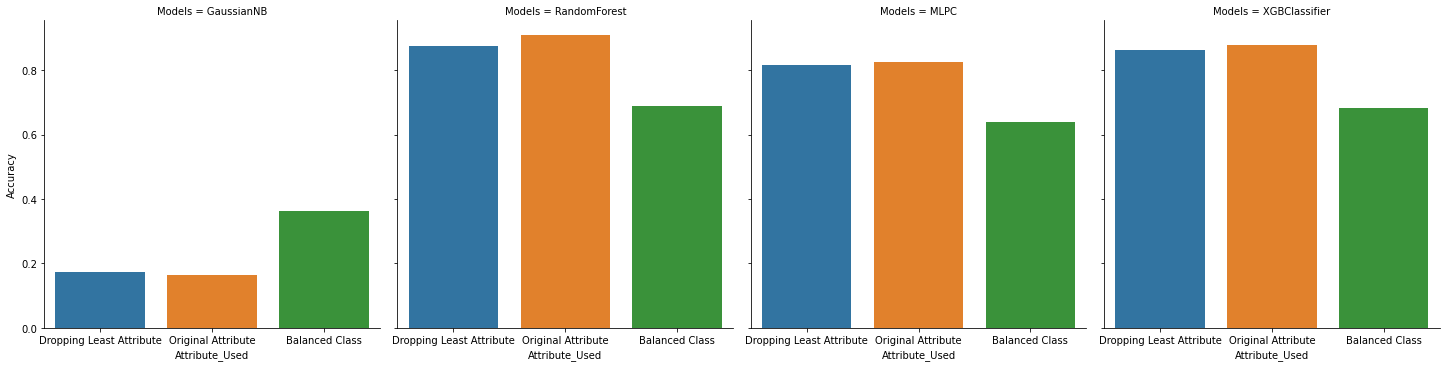

In [83]:
plt.figure(figsize=(20,8))
sns.factorplot('Attribute_Used','Accuracy', col='Models',data=dfmodelcomp, kind='bar')
plt.savefig("modelsAccuracy.png")

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x576 with 0 Axes>

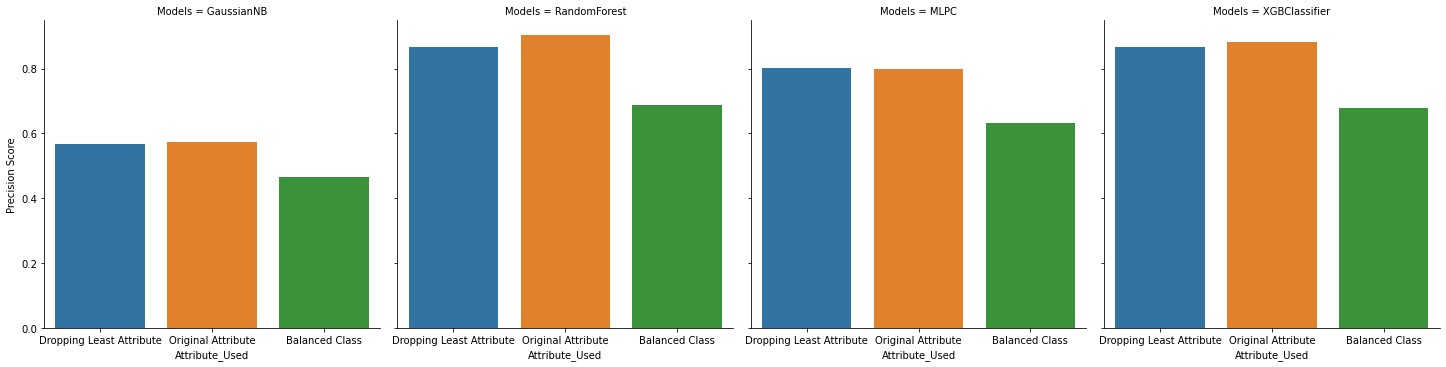

In [84]:
plt.figure(figsize=(20,8))
sns.factorplot('Attribute_Used','Precision Score', col='Models',data=dfmodelcomp, kind='bar')
plt.savefig("modelsPrecision.png")

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x576 with 0 Axes>

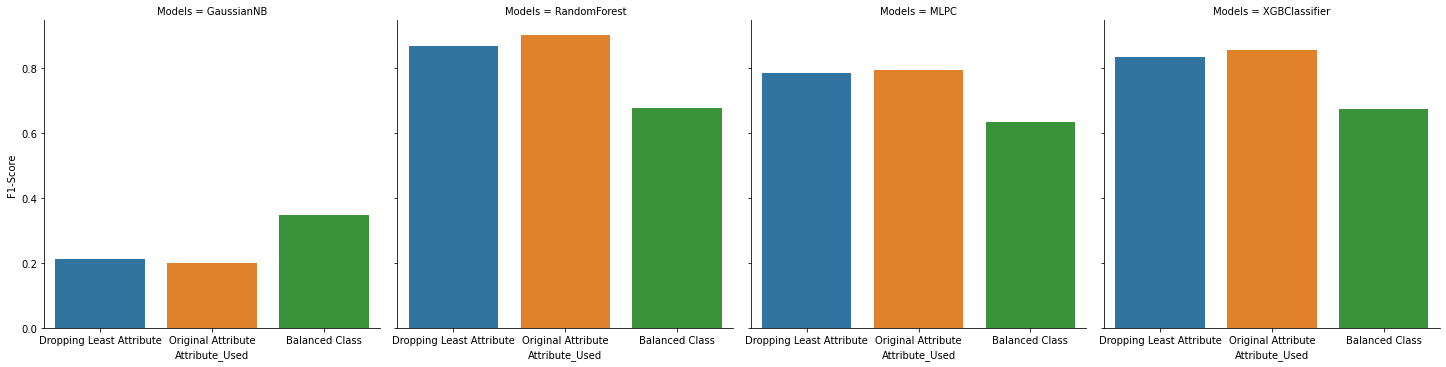

In [85]:
plt.figure(figsize=(20,8))
sns.factorplot('Attribute_Used','F1-Score', col='Models',data=dfmodelcomp, kind='bar')
plt.savefig("modelsf1score.png")